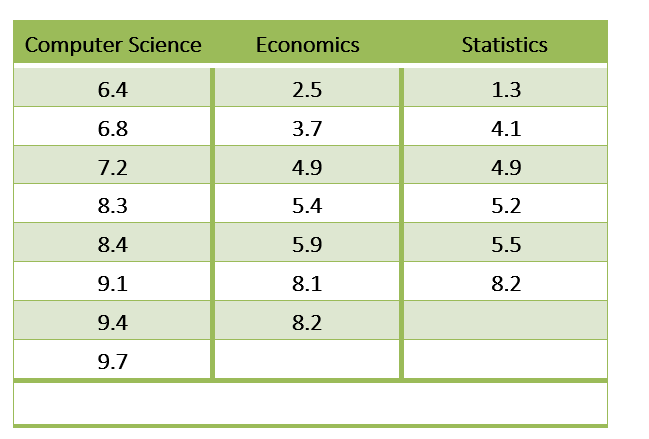

In [18]:
import numpy as np
import pandas as pd
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare


In [19]:
data_CS = pd.DataFrame()
data_E = pd.DataFrame()
data_S = pd.DataFrame()
data_CS['CS'] = np.array([6.4, 6.8, 7.2, 8.3, 8.4, 9.1, 9.4, 9.7])
data_E['E'] = np.array([2.5, 3.7, 4.9, 5.4, 5.9, 8.1, 8.2])
data_S['S'] = np.array([1.3, 4.1, 4.9, 5.2, 5.5, 8.2])

In [20]:
combined_data = pd.concat([data_CS, data_E, data_S], axis=1)

print(combined_data)

    CS    E    S
0  6.4  2.5  1.3
1  6.8  3.7  4.1
2  7.2  4.9  4.9
3  8.3  5.4  5.2
4  8.4  5.9  5.5
5  9.1  8.1  8.2
6  9.4  8.2  NaN
7  9.7  NaN  NaN


In [21]:
long_format_data = pd.melt(combined_data, var_name='Category', value_name='Value')
long_format_data = long_format_data.dropna()
#print(long_format_data)
long_format_data['Rank'] = long_format_data['Value'].rank(method='average')

print(long_format_data)

   Category  Value  Rank
0        CS    6.4  11.0
1        CS    6.8  12.0
2        CS    7.2  13.0
3        CS    8.3  17.0
4        CS    8.4  18.0
5        CS    9.1  19.0
6        CS    9.4  20.0
7        CS    9.7  21.0
8         E    2.5   2.0
9         E    3.7   3.0
10        E    4.9   5.5
11        E    5.4   8.0
12        E    5.9  10.0
13        E    8.1  14.0
14        E    8.2  15.5
16        S    1.3   1.0
17        S    4.1   4.0
18        S    4.9   5.5
19        S    5.2   7.0
20        S    5.5   9.0
21        S    8.2  15.5


In [22]:
kruskal_result = kruskal(
    long_format_data[long_format_data['Category'] == 'CS']['Value'],
    long_format_data[long_format_data['Category'] == 'E']['Value'],
    long_format_data[long_format_data['Category'] == 'S']['Value']
)

print("Kruskal-Wallis test result:", kruskal_result)

Kruskal-Wallis test result: KruskalResult(statistic=9.849061861415572, pvalue=0.007266133800809758)


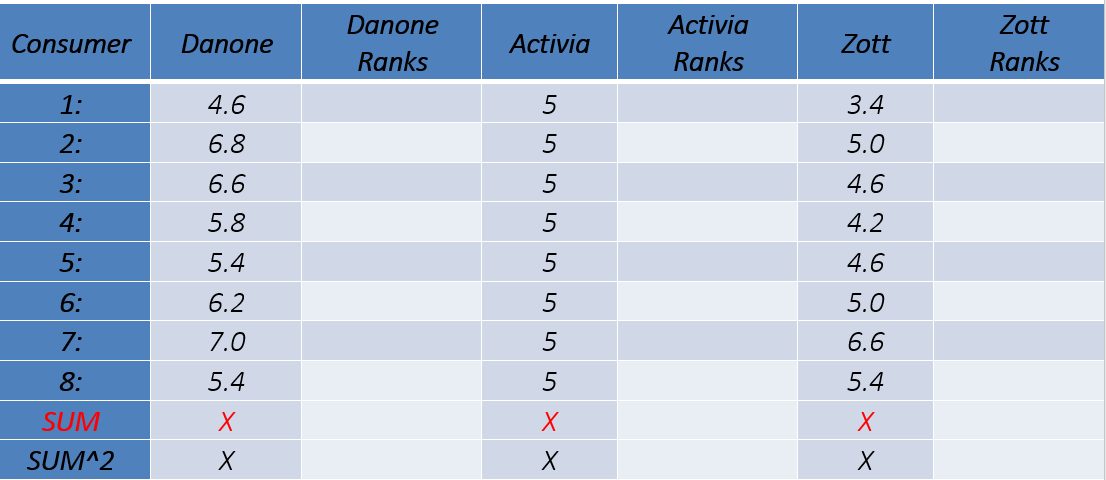

In [23]:
import pandas as pd

# Headers excluding the "Ranks" columns
headers = ["Consumer", "Danone", "Activia", "Zott"]

# Data excluding the "Ranks" columns
data = [
    [1, 4.6, 5, 3.4],
    [2, 6.8, 5, 5.0],
    [3, 6.6, 5, 4.6],
    [4, 5.8, 5, 4.2],
    [5, 5.4, 5, 4.6],
    [6, 6.2, 5, 5.0],
    [7, 7.0, 5, 6.6],
    [8, 5.4, 5, 5.4]
]

# Create a DataFrame
df = pd.DataFrame(data, columns=headers)
# Display the DataFrame
print(df)


   Consumer  Danone  Activia  Zott
0         1     4.6        5   3.4
1         2     6.8        5   5.0
2         3     6.6        5   4.6
3         4     5.8        5   4.2
4         5     5.4        5   4.6
5         6     6.2        5   5.0
6         7     7.0        5   6.6
7         8     5.4        5   5.4


In [24]:

# Rank the values row-wise, handling ties by averaging the rank values
df_ranked = df.drop(columns=["Consumer"]).rank(axis=1, method='average')

# Add the "Consumer" column back to the ranked DataFrame
df_ranked.insert(0, "Consumer", df["Consumer"])

# Display the ranked DataFrame
print(df_ranked)

   Consumer  Danone  Activia  Zott
0         1     2.0      3.0   1.0
1         2     3.0      1.5   1.5
2         3     3.0      2.0   1.0
3         4     3.0      2.0   1.0
4         5     3.0      2.0   1.0
5         6     3.0      1.5   1.5
6         7     3.0      1.0   2.0
7         8     2.5      1.0   2.5


In [25]:
friedman_result = friedmanchisquare(
    df_ranked["Danone"],
    df_ranked["Activia"],
    df_ranked["Zott"]
)

print("Friedman test result:", friedman_result)

Friedman test result: FriedmanchisquareResult(statistic=9.172413793103448, pvalue=0.010191442345713928)
